In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from matplotlib import cm

### 4a)

In [81]:
edge = np.linspace(0,1,100)
lower_x = 0 #V(x=0) = 0
upper_x = 0 #V(x=a) = 0
lower_y = 0 #V(y=0) = 0
upper_y = 0 #V(y=a) = 0
lower_z = 0 #V(z=0) = 0
upper_z = 1 #V(z=a) = V0

In [82]:
yv, zv = np.meshgrid(edge, edge)
potential = np.zeros((100,100))

In [83]:
#Taken from tutorial 3
import numba
from numba import jit

@numba.jit("f8[:,:](f8[:,:], i8)", nopython=True, nogil=True)
def compute_potential(potential, n_iter):
    length = len(potential[0])
    for n in range(n_iter):
        for i in range(1, length-1):
            for j in range(1, length-1):
                potential[j][i] = 1/4 * (potential[j+1][i] + potential[j-1][i] + potential[j][i+1] + potential[j][i-1])
    return potential

In [84]:
#Applying b.c. to the potenial
potential = np.zeros((100,100))
potential[0,:]= lower_y
potential[-1,:]= upper_y
potential[:,0]= lower_z
potential[:,-1]= upper_z
potential = compute_potential(potential, n_iter=10000)

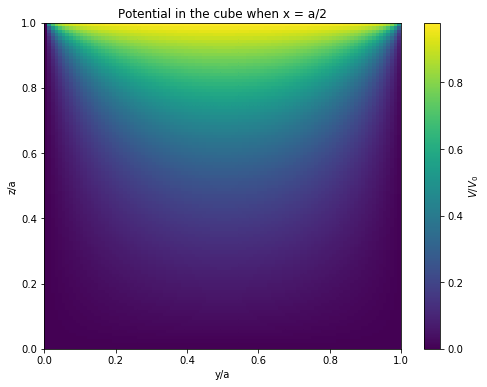

In [85]:
#Plotting the respective colour plot
fig, ax = plt.subplots(1, 1, figsize=(8,6))
clr_plot = ax.pcolor(zv, yv, potential)
ax.set_xlabel('y/a')
ax.set_ylabel('z/a')
fig.colorbar(clr_plot, label='$V/V_0$')
ax.set_title('Potential in the cube when x = a/2')
plt.show()

In [86]:
potential[50][50]

0.25419710863784484

The potential, $\frac{V}{V_0}$ at the centre of the cube (a/2,a/2,a/2) is approximately 0.2542. When compared to the value of 0.1667, the values differ by a sizeable amount, this may be due to the exactness of the middle point being slightly off.